In [545]:
from math import exp as e_
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as io


# 1.1

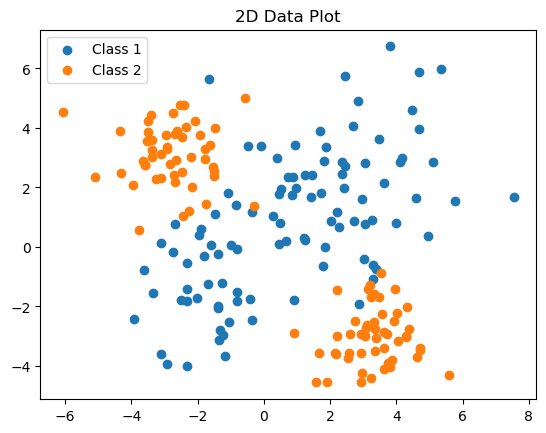

In [546]:
hw5_1 = io.loadmat("hw5.mat")['hw5_1']
hw5_2 = io.loadmat("hw5.mat")['hw5_2']


d1, d2 = hw5_1, hw5_2

plt.scatter(d1[0],d1[1])
plt.scatter(d2[0],d2[1])
plt.legend(labels=['Class 1','Class 2'])
plt.title('2D Data Plot')

plt.show()

# 1.2

Use Stochastic Backpropagation Algorithm to train a neural network, with following settings:  
•	Number of hidden nodes = 10,  
    Number of input nodes = 2 (= input pattern dimension),   
    Number of output nodes = 2 (= number of categories)  
•	Convergence criterion = 0.1  
•	Convergence rate (i.e. step size) = 0.1  
•	Activation function f(net) = a.tanh (b.net), and a=1.716, b=2/3.  
•	Target vector for ω1 is [1, -1]t, and target vector for ω2 is [-1, 1]t  
•	Using standardized input patterns (pp. 308), and random uniform weights initialization (pp. 311)   


In [814]:
d1, d2 = hw5_1, hw5_2
target = np.array(list(zip([1 for _ in range(100)], [-1 for _ in range(100)])))
target = np.concatenate((target, -target), axis=0)

d1, d2 = d1/np.linalg.norm(d1), d2/np.linalg.norm(d2)
train = np.concatenate((d1.T, d2.T), axis=0)


theta=0.1;                           # criterion to stop
eta=0.1;                             # step size
nh=10;                               # number of hidden nodes, actual hidden nodes should be 11 (including a biase)
ni=2;                                # dimension of input vector = number of input nodes, 
                                     #           actual input nodes should be 3 (including a bias)
no=2;                                # number of class = number of out nodes

def init_weights():
    '''set weights according to slide 54 in lesson 10'''
    # input-to-hidden layer
    d = 1/np.sqrt(200)
    w_ih = np.random.uniform(-d,d,size=(nh,ni))
    # hidden-to-output layer
    n = 1/np.sqrt(nh)
    w_ho = np.random.uniform(-n,n, size=(no, nh))
    return w_ih, w_ho

def calc_net(w,x,n):
    '''given input weight matrix (synapse), num of hidden units,
    and a training sample vector, return net activation vector'''
    # append bias terms
    w = np.hstack( (w,np.ones((n,1))) )    
    x = np.hstack((1,x))
    return np.dot(w, x)

def activation(a,b,net):
    '''Tanh activation function'''
    b_net = b*net
    return a*((e_(b_net)-e_(-b_net))/(e_(b_net)+e_(-b_net)))

def sech_squared(n):
    '''f'net function helper for sech^2 activation'''
    return 1 / (math.cosh(b*n)**2)

def f_prime(net):
    '''f'net '''
    return np.array([a*b*sech_squared(n) for n in net])

def update_weights(x,t,w_ih,w_ho):
    net_j = calc_net(w_ih,x,nh)

    y = np.array([activation(a,b,n) for n in net_j])

    net_k = calc_net(w_ho,y,no)
    z_out = np.array([activation(a,b,n) for n in net_k])
    
    delta_k = np.dot(t-z_out,f_prime(net_k))
    delta_j = np.dot(sum(np.dot(delta_k,w_ho)),f_prime(net_j))

    w_ih += np.outer(delta_j,x)*eta
    w_ho += np.outer(delta_k,y)*eta
    return w_ih, w_ho, z_out

 
a, b = 1.716, 2/3   
d = len(train)
w_ih, w_ho = init_weights()  
print("Initial weights:\n")
print(w_ih, w_ho,'\n')

for idx in range(100):
    error = []
    for i in range(len(target)):
        x_i, t_i = train[i], target[i]
        w_ih, w_ho, z_out = update_weights(x_i,t_i,w_ih,w_ho)
        error.append(0.5*(np.abs(t-z_out)**2))

    error_rate = sum(np.abs(np.diff(error)))/200
    
    if error_rate < theta:
        break
    
print("Final weights:\n")
print(w_ih, w_ho,'\n')
print('Final Error Rate:\n')
print(error_rate[0])


Initial weights:

[[ 0.04683794  0.02995315]
 [-0.04383164 -0.03462991]
 [ 0.0344423  -0.04146155]
 [-0.01006368 -0.03394217]
 [-0.0636694  -0.03331976]
 [-0.02212513  0.02225449]
 [-0.02160279  0.05991528]
 [-0.06737451  0.06173588]
 [-0.05680244 -0.05390334]
 [-0.01914394  0.05729524]] [[-0.08031152  0.07646603  0.27319769  0.25662402 -0.06775707  0.13718913
   0.02593062 -0.04885844 -0.197787    0.2974539 ]
 [ 0.25996687 -0.15728328  0.24345051  0.28774839  0.04443092  0.19244529
   0.09027925  0.27555191  0.18322849  0.05580936]] 

Final weights:

[[ 0.12359956 -0.20872135]
 [ 0.03292998 -0.27330441]
 [ 0.11120392 -0.28013605]
 [ 0.06669794 -0.27261667]
 [ 0.01309222 -0.27199426]
 [ 0.05463649 -0.21642001]
 [ 0.05515883 -0.17875921]
 [ 0.00938711 -0.17693862]
 [ 0.01995919 -0.29257784]
 [ 0.05761768 -0.18137926]] [[-0.16285874 -0.16773176  0.17436705  0.07468025 -0.34857936 -0.07234947
  -0.18620068 -0.34548759 -0.46403513  0.09011243]
 [ 0.17741965 -0.40148106  0.14461987  0.10580

# 1.3

In [843]:
 
D = np.array([[2,2],[-3,-3],[-2,5],[3,-4]])
D = np.concatenate((train,D/np.linalg.norm(D)))

w_ih, w_ho = init_weights()  

for idx in range(200):
    error = []
    preds = []
    for i in range(len(target)):
        x_i, t_i = D[i], target[i]
        w_ih, w_ho, z_out = update_weights(x_i,t_i,w_ih,w_ho)
        error.append(0.5*(np.abs(t-z_out)**2))
        preds.append(z_out)

    error_rate = sum(np.abs(np.diff(error)))/200
    
    if error_rate < theta:
        break
    
for i,p in enumerate(preds[-4:]):
    if math.dist(p, np.array([-1,1])) > math.dist(p, np.array([1,-1])):
        print(f'D{i} belongs to class 2.')
        
    else: 
        print(f'D{i} belongs to class 1.')


D0 belongs to class 1.
D1 belongs to class 1.
D2 belongs to class 2.
D3 belongs to class 2.

